In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re
import os
tf.__version__
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# path_train = "your train.csv file path"
# path_val = "your val.csv file path"

# df_train = pd.read_csv(path_train)
# df_val = pd.read_csv(path_val)
# def clean_data(text):
#     text = text.lower()
#     text = re.sub(r"[-=+*\"#@!$%^&()`<>\[\]]","",text)
#     text = re.sub(r"i'm","i am",text)
#     text = re.sub(r"he's","he is",text)
#     text = re.sub(r"she's","she is",text)
#     text = re.sub(r"it's","it is",text)
#     text = re.sub(r"they're","they are",text)
#     text = re.sub(r"there're","there are",text)
#     text = re.sub(r"there's","there is",text)
#     text = re.sub(r"how're","how are",text)
#     text = re.sub(r"what're","what are",text)
#     text = re.sub(r"where're","where ",text)
#     text = re.sub(r"who're","who are",text)
#     text = re.sub(r"that're","that are",text)
#     text = re.sub(r"when're","when are",text)
#     text = re.sub(r"how's","how is",text)
#     text = re.sub(r"what's","what is",text)
#     text = re.sub(r"where's","where is",text)
#     text = re.sub(r"who's","who is",text)
#     text = re.sub(r"that's","that is",text)
#     text = re.sub(r"when's","when is",text)
#     text = re.sub(r"won't","would not",text)
#     text = re.sub(r"nt't","can not",text)
#     text = re.sub(r"\'bout'","about",text)
#     text = re.sub(r"\'till'","untill",text)
#     text = re.sub(r"\'ll","will",text)
#     text = re.sub(r"\'ve","have",text)
#     text = re.sub(r"\'re","are",text)
#     text = re.sub(r"\'d","would",text)
#     text = re.sub(r"\."," ",text)
#     text = re.sub(r"\,"," ",text)
#     text = re.sub(r"\!"," ",text)
#     text = re.sub(r"\?"," ",text)
#     text = re.sub(r"\;"," ",text)
#     text = re.sub(r"\:"," ",text)
#     return text

    
# df_train['text'] = df_train['text'].apply(clean_data)
# df_train['augmented_text'] = df_train['augmented_text'].apply(clean_data)
# df_val['text'] = df_val['text'].apply(clean_data)
# df_val['augmented_text'] = df_val['augmented_text'].apply(clean_data)

# data = pd.concat([df_train,df_val])

In [4]:
#data.csv is being pre-process to save time for training
path = "Your train.csv file path"
data = pd.read_csv(path)

In [5]:
max_length = 8

In [6]:
df = data[data['text'].apply(lambda x: len(x.split(" "))< max_length +1)]

In [8]:
train_df = df['augmented_text']
test_df = df['text']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_df, test_df, test_size=0.2, random_state=24)
val_x, test_x,val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, random_state=24)


In [9]:
train_x

402452               elagl fight over alp cmapagin brochure
45026                 0sczrs qhoq goes on but no red dar0et
658341     solar hokd precibft launched in qbite gum valley
207624      apm housing rental eroprt darwin most expenisev
917206           us soldier klilde 4 uhtr in abgdhad attack
                                ...                        
577944                 airoptr sells benefits of new urcfew
623630             chxllehge for tasmanias housing inwusfry
254890    action group clasrifies menindee nwatecr situa...
1081         qarkizy criticises us yustic2 in polsnzki case
292316         oppoistoin questions power sattoin viability
Name: augmented_text, Length: 611100, dtype: object

In [10]:
val_x

423286    serial drink xiver allegedly caught drumk drkv...
574202    tourism bpry confident of improved faculties a...
147188                   btteer to come from norman  odhges
802320    reportevr baea5ts ppnolice to witness in backp...
151734    uji9n wants rethink on teacher crimijsl record...
                                ...                        
132413             phoenix expevtee to ta  fight to t bkrdq
57286     timothy baker not guklt5 of murveding glwdo mi...
396333                a few words with the lcubhosue ledare
704777                congo cu rigbleader surrounded kabila
301112        ex62nded interview qitg diuy ferguson ap golf
Name: augmented_text, Length: 76388, dtype: object

In [12]:

g_text_tokenizer = Tokenizer()
g_text_tokenizer.fit_on_texts(train_x)
g_text_word_index = g_text_tokenizer.word_index
train_sequences = g_text_tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post')


text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(train_y)
text_word_index = text_tokenizer.word_index
test_sequences = text_tokenizer.texts_to_sequences(train_y)
test_padded = pad_sequences(test_sequences,maxlen = max_length, padding='post')





In [13]:
val_train_sequences = g_text_tokenizer.texts_to_sequences(val_x)
val_train_padded = pad_sequences(val_train_sequences, maxlen = max_length, padding='post')

val_test_sequences = text_tokenizer.texts_to_sequences(val_y)
val_test_padded = pad_sequences(val_test_sequences, maxlen = max_length, padding='post')

In [15]:
g_vocab_size = len(g_text_word_index)+1
vocab_size = len(text_word_index)+1
print(g_vocab_size, vocab_size)

844814 79061


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=256, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
learning_rate = 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])

In [18]:
model.summary(expand_nested=True,
    show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 8, 256)            21627238  Y          
                                                       4                    
                                                                            
 bidirectional (Bidirectiona  (None, 8, 256)           394240    Y          
 l)                                                                         
                                                                            
 dropout (Dropout)           (None, 8, 256)            0         Y          
                                                                            
 bidirectional_1 (Bidirectio  (None, 8, 256)           394240    Y          
 nal)                                                                       
                                                        

In [19]:
train_padded.shape

(611100, 8)

In [20]:
temp_test_padded = test_padded.reshape((test_padded.shape[0], test_padded.shape[1],1))
temp_train_padded = train_padded.reshape((train_padded.shape[0], train_padded.shape[1],1))


In [21]:
epoch = 14
his = model.fit(train_padded, test_padded, batch_size=512, epochs=epoch, validation_data = (val_train_padded, val_test_padded))

Epoch 1/14


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:439: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 216272384 elements. This may consume a large amount of memory.
  num_elements)


1194/1194 [==============================] - 444s 362ms/step - loss: 4.7023 - accuracy: 0.4351 - val_loss: 7.5977 - val_accuracy: 0.5167
Epoch 2/14
1194/1194 [==============================] - 430s 361ms/step - loss: 2.7481 - accuracy: 0.6741 - val_loss: 7.3020 - val_accuracy: 0.5659
Epoch 3/14
1194/1194 [==============================] - 430s 361ms/step - loss: 2.2935 - accuracy: 0.7261 - val_loss: 6.8700 - val_accuracy: 0.5812
Epoch 4/14
1194/1194 [==============================] - 431s 361ms/step - loss: 2.0460 - accuracy: 0.7542 - val_loss: 6.7734 - val_accuracy: 0.5883
Epoch 5/14
1194/1194 [==============================] - 430s 360ms/step - loss: 1.8912 - accuracy: 0.7744 - val_loss: 6.7057 - val_accuracy: 0.5929
Epoch 6/14
1194/1194 [==============================] - 430s 360ms/step - loss: 1.7867 - accuracy: 0.7901 - val_loss: 6.7886 - val_accuracy: 0.5971
Epoch 7/14
1194/1194 [==============================] - 431s 361ms/step - loss: 1.6959 - accuracy: 0.8023 - val_loss: 6.910

In [22]:
# model.save('/content/drive/MyDrive/Colab_Notebooks/accuracy_84_3lstm_rnn_8inputlength')

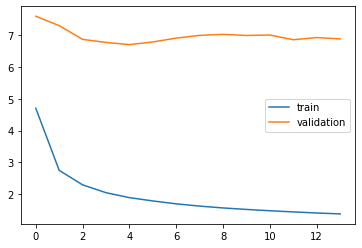

In [23]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [24]:
test_sample = test_x.iloc[:10]
test_sample = g_text_tokenizer.texts_to_sequences(test_sample)
test_sample = pad_sequences(test_sample, maxlen=max_length, padding='post')





In [25]:
test_sample.shape

(10, 8)

In [26]:
test_x.iloc[:2]

810765    kroena war vetrenas lay wrethas at war memorial
647694           clmiaet change still on the radar survey
Name: augmented_text, dtype: object

In [27]:
test_y.iloc[:2]

810765    korean war veterans lay wreaths at war memorial
647694           climate change still on the radar survey
Name: text, dtype: object

In [28]:
pre = model.predict(test_sample)
pre.shape

(10, 8, 79061)

In [31]:
def deTokenize(logits):
    index_to_words = {id: word for word, id in text_tokenizer.word_index.items()}
    index_to_words[0] = ''
    pre_index = np.argmax(logits, 1)
    return ' '.join(index_to_words[prediction] for prediction in pre_index)

In [32]:
print("Iutput:    ",test_x.iloc[1])
print("Actual:    ",test_y.iloc[1])
print("Predicted: ",deTokenize(pre[1]))

Iutput:     clmiaet change still on the radar survey
Actual:     climate change still on the radar survey
Predicted:  climate change still on the radar survey 


In [33]:
predict = []
for i in range(10):
  predict.append(deTokenize(pre[i]))



In [34]:
predict

['korean war footage lay at war memorial ',
 'climate change still on the radar survey ',
 'form printed threatens naplan test unrepentant union says',
 'norwood risk tasmania processor    ',
 'rhino charges removed family at australia zoo ',
 'man wins retrial over sex   ',
 'health service mental health    ',
 '11 arrested travelling to 1000   ',
 'premier attacks opposition over foi   ',
 'cowboys coach queries nrl fine   ']

In [35]:
eva = pd.DataFrame({'input': test_x.iloc[:10], 'output': test_y.iloc[:10], 'predict':predict})

In [36]:
eva

,input,output,predict
810765,kroena war vetrenas lay wrethas at war memorial,korean war veterans lay wreaths at war memorial,korean war footage lay at war memorial
647694,clmiaet change still on the radar survey,climate change still on the radar survey,climate change still on the radar survey
906447,ofmr flaw threatens naplan estt accuracy union...,form flaw threatens naplan test accuracy union...,form printed threatens naplan test unrepentant...
43169,0ppy mildew risk tazmanix processor,poppy mildew risk tasmania processor,norwood risk tasmania processor
849703,rhino carhges iirwn family at asurtalia zoo,rhino charges irwin family at australia zoo,rhino charges removed family at australia zoo
890223,man wins retrial ov3e sex offrnde vharyes,man wins retrial over sex offence charges,man wins retrial over sex
447621,health service addressgin mental haelht,health service addressing mental health,health service mental health
329081,11 arrested rtavelilng to bathruts 1000,11 arrested travelling to bathurst 1000,11 arrested travelling to 1000
151255,premier attacks opposition oc4r foi tequesfs,premier attacks opposition over foi requests,premier attacks opposition over foi
598551,owcboys coach queries nrl atmuo fine,cowboys coach queries nrl tamou fine,cowboys coach queries nrl fine
